# Assignment 4

In this assignment, you'll combine the assignment 3 data set with nutrition data from the [USDA Food Composition Databases](https://ndb.nal.usda.gov/ndb/search/list). The CSV file `fresh.csv` contains the fresh fruits and vegetables data you extracted in assignment 3.

The USDA Food Composition Databases have a [documented](https://ndb.nal.usda.gov/ndb/doc/index) web API that returns data in JSON format . You need a key in order to use the API. Only 1000 requests are allowed per hour, so it would be a good idea to use [caching][requests_cache].

[Sign up for an API key here](https://api.data.gov/signup/). The key will work with any Data.gov API. You may need the key again later in the quarter, so make sure you save it.

These modules may be useful:

* [requests](http://docs.python-requests.org/en/master/user/quickstart/)
* [requests_cache][]
* [urlparse](https://docs.python.org/2/library/urlparse.html)
* [pandas](http://pandas.pydata.org/pandas-docs/stable/)

[requests_cache]: https://pypi.python.org/pypi/requests-cache

In [1]:
key = "kbMc0yi9xK70gyrGyQjcUBGoWUnRwqag5DNpmP4W"

__Exercise 1.1.__ Read the [search request documentation](https://ndb.nal.usda.gov/ndb/doc/apilist/API-SEARCH.md), then write a function called `ndb_search()` that makes a search request. The function should accept the search term as an argument. The function should return the search result items as a list (for 0 items, return an empty list).

Note that the search url is: `https://api.nal.usda.gov/ndb/search`

As an example, a search for `"quail eggs"` should return this list:

```python
[{u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u'CHAOKOH, QUAIL EGG IN BRINE, UPC: 044738074186',
  u'ndbno': u'45094707',
  u'offset': 0},
 {u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u'L&W, QUAIL EGGS, UPC: 024072000256',
  u'ndbno': u'45094890',
  u'offset': 1},
 {u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u'BUDDHA, QUAIL EGGS IN BRINE, UPC: 761934535098',
  u'ndbno': u'45099560',
  u'offset': 2},
 {u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u'GRAN SABANA, QUAIL EGGS, UPC: 819140010103',
  u'ndbno': u'45169279',
  u'offset': 3},
 {u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u"D'ARTAGNAN, QUAIL EGGS, UPC: 736622102630",
  u'ndbno': u'45178254',
  u'offset': 4},
 {u'ds': u'SR',
  u'group': u'Dairy and Egg Products',
  u'name': u'Egg, quail, whole, fresh, raw',
  u'ndbno': u'01140',
  u'offset': 5}]
```

As usual, make sure you document and test your function.

In [17]:
import requests
import urllib2
#import requests_cache
#requests_cache.install_cache("cache")
from urllib2 import Request, urlopen
from urlparse import urlparse, urlunparse
from pandas.tools.plotting import scatter_matrix
import pandas as pd
import numpy as np
import json

In [18]:
def ndb_search(key, q, return_request = False):
    urlbase = "https://api.nal.usda.gov/ndb/search/"
    
    params = ({"q": q})
    #params.update({"offset":offset})
    params.update({"format":"json", "sort":"r"})
    params.update({"api_key":key})
    
    if return_request:
        return requests.get(url,params=params).json()
    response = urlbase + "?" + "&".join("{}={}".format(a,b) for a,b in params.items())
    
    response = response.replace(" ","%20")
    
    collreq = Request(response)
    collf = urllib2.urlopen(collreq)
    college_json = json.loads(collf.read())

    urllist = [i for i in college_json.values()]
        
    #for 0 items, return an empty list.
    if urllist[0].has_key('error') == True:
        urllist = []
        
    return urllist

In [19]:
test = ndb_search(key, "quail eggs")
test

[{u'ds': u'any',
  u'end': 6,
  u'group': u'',
  u'item': [{u'ds': u'BL',
    u'group': u'Branded Food Products Database',
    u'name': u'CHAOKOH, QUAIL EGG IN BRINE, UPC: 044738074186',
    u'ndbno': u'45094707',
    u'offset': 0},
   {u'ds': u'BL',
    u'group': u'Branded Food Products Database',
    u'name': u'L&W, QUAIL EGGS, UPC: 024072000256',
    u'ndbno': u'45094890',
    u'offset': 1},
   {u'ds': u'BL',
    u'group': u'Branded Food Products Database',
    u'name': u'BUDDHA, QUAIL EGGS IN BRINE, UPC: 761934535098',
    u'ndbno': u'45099560',
    u'offset': 2},
   {u'ds': u'BL',
    u'group': u'Branded Food Products Database',
    u'name': u'GRAN SABANA, QUAIL EGGS, UPC: 819140010103',
    u'ndbno': u'45169279',
    u'offset': 3},
   {u'ds': u'BL',
    u'group': u'Branded Food Products Database',
    u'name': u"D'ARTAGNAN, QUAIL EGGS, UPC: 736622102630",
    u'ndbno': u'45178254',
    u'offset': 4},
   {u'ds': u'SR',
    u'group': u'Dairy and Egg Products',
    u'name': u'Egg, q

__Exercise 1.2.__ Use your search function to get NDB numbers for the foods in the `fresh.csv` file. It's okay if you don't get an NDB number for every food, but try to come up with a strategy that gets most of them. Discuss your strategy in a short paragraph.

Hints:

* The foods are all raw and unbranded.
* You can test search terms with the [online search page](https://ndb.nal.usda.gov/ndb/search/list).
* You can convert the output of `ndb_search()` to a data frame with `pd.DataFrame()`.
* The string methods for [Python](https://docs.python.org/2/library/stdtypes.html#string-methods) and [Pandas](http://pandas.pydata.org/pandas-docs/stable/text.html#method-summary) are useful here. It's okay if you use _simple_ regular expressions in the Pandas methods, although this exercise can be solved without them.
* You can merge data frames that have a column in common with `pd.merge()`.

In [148]:
import pandas as pd
path = "/Users/Stephanie/Desktop/STA141/Assignments/fresh.csv"
fresh = pd.read_csv(path, header = 0)

In [206]:
temp = []
numlist = []
listname = []
name = []

#add "raw" to list of food to search
food = fresh['food']
food = food.str.replace("_",' ')
food = food.str.replace("kiwi", "kiwifruit")
food = food + ' raw'

for i in range(0,len(food)):
    foodlist = ndb_search(key, food[i])
    if foodlist != []:
        for j in range(0, len(foodlist[0]['item'])):
            #find the one that are not in the Branded Food Products group and get the name
            if foodlist[0]['item'][j]['group']!= "Branded Food Products Database":
                if foodlist[0]['item'][j]['name'].endswith('raw') and foodlist[0]['item'][j]['name'].find('juice') == -1:
                    listname = foodlist[0]['item'][j]['name']
                    name.append(listname)
                    #get the ndb number
                    num = foodlist[0]['item'][j]['ndbno']
                    temp.append(num)
                    
                #if "raw" is in the middle
                elif foodlist[0]['item'][j]['name'].find(', raw') > -1:
                    if foodlist[0]['item'][j]['name'].find('juice') == -1:
                        listname = foodlist[0]['item'][j]['name']
                        name.append(listname)
                        num = foodlist[0]['item'][j]['ndbno']
                        temp.append(num)
        if len(temp) == 0:
            numlist.append('')
        else:
            numlist.append(temp[0])
        temp = []
            
    else:
        numlist.append('')

In [350]:
fresh = pd.DataFrame(fresh)
fresh["NDB number"] = pd.DataFrame(numlist)
fresh[["food","NDB number"]]

,food,NDB number
0,watermelon,09326
1,cantaloupe,09181
2,tangerines,09218
3,strawberries,09316
4,plums,09279
5,oranges,09201
6,raspberries,09302
7,pomegranate,09286
8,pineapple,09266
9,apricots,09021


In [ ]:
#My strategy to find the ndb number is first trying to add "raw" into each food in the list so that when I search,
# I could return the smallest results. Then I find the food that are not in the
#group "Branded Food Products Database" and try to find the one that has the name ends 
#with "raw" and those that are not juice. For those that didn't have "raw" at the end of the
#string, I try to find them to see if they have "raw" contains in the middle of the name,
#then try to extract those names in the same exact way.

__Exercise 1.3.__ Read the [food reports V2 documentation](https://ndb.nal.usda.gov/ndb/doc/apilist/API-FOOD-REPORTV2.md), then write a function called `ndb_report()` that requests a _basic_ food report. The function should accept the NDB number as an argument and return the list of nutrients for the food.

Note that the report url is: `https://api.nal.usda.gov/ndb/V2/reports`

For example, for `"09279"` (raw plums) the first element of the returned list should be:

```python
{u'group': u'Proximates',
 u'measures': [{u'eqv': 165.0,
   u'eunit': u'g',
   u'label': u'cup, sliced',
   u'qty': 1.0,
   u'value': u'143.93'},
  {u'eqv': 66.0,
   u'eunit': u'g',
   u'label': u'fruit (2-1/8" dia)',
   u'qty': 1.0,
   u'value': u'57.57'},
  {u'eqv': 151.0,
   u'eunit': u'g',
   u'label': u'NLEA serving',
   u'qty': 1.0,
   u'value': u'131.72'}],
 u'name': u'Water',
 u'nutrient_id': u'255',
 u'unit': u'g',
 u'value': u'87.23'}
```

Be sure to document and test your function.

In [204]:
def ndb_report(key, num, return_request = False):
    urlbase = "https://api.nal.usda.gov/ndb/V2/reports"
    
    params = ({"ndbno": num})
    params.update({"type": "b"})
    params.update({"format":"json"})
    params.update({"api_key":key})
    
    if return_request:
        return requests.get(url,params=params).json()
    response = urlbase + "?" + "&".join("{}={}".format(a,b) for a,b in params.items())

    collreq = Request(response)
    collf = urllib2.urlopen(collreq)
    college_json = json.loads(collf.read())

    urllist = [i for i in college_json.values()]
    return urllist[2][0]['food']['nutrients']

In [205]:
ndb_report(key, "09279")

[{u'group': u'Proximates',
  u'measures': [{u'eqv': 165.0,
    u'eunit': u'g',
    u'label': u'cup, sliced',
    u'qty': 1.0,
    u'value': u'143.93'},
   {u'eqv': 66.0,
    u'eunit': u'g',
    u'label': u'fruit (2-1/8" dia)',
    u'qty': 1.0,
    u'value': u'57.57'},
   {u'eqv': 151.0,
    u'eunit': u'g',
    u'label': u'NLEA serving',
    u'qty': 1.0,
    u'value': u'131.72'}],
  u'name': u'Water',
  u'nutrient_id': u'255',
  u'unit': u'g',
  u'value': u'87.23'},
 {u'group': u'Proximates',
  u'measures': [{u'eqv': 165.0,
    u'eunit': u'g',
    u'label': u'cup, sliced',
    u'qty': 1.0,
    u'value': u'76'},
   {u'eqv': 66.0,
    u'eunit': u'g',
    u'label': u'fruit (2-1/8" dia)',
    u'qty': 1.0,
    u'value': u'30'},
   {u'eqv': 151.0,
    u'eunit': u'g',
    u'label': u'NLEA serving',
    u'qty': 1.0,
    u'value': u'69'}],
  u'name': u'Energy',
  u'nutrient_id': u'208',
  u'unit': u'kcal',
  u'value': u'46'},
 {u'group': u'Proximates',
  u'measures': [{u'eqv': 165.0,
    u'eunit

__Exercise 1.4.__ Which foods provide the best combination of price, yield, and nutrition? You can use kilocalories as a measure of "nutrition" here, but more a detailed analysis is better. Use plots to support your analysis.

In [ ]:
#Since I am interested in the nutrient Energy, Carbonhydrate, Fiber, and Vitamin C, 
#I used the following function to get the nutrients values

In [214]:
nutrientlist = []

food = fresh['food']

def get_nutrient(nutrient_type):
    nutrient_l = []
    temp2 = []
    for i in range(0, len(fresh['food'])):
        if len(fresh["NDB number"][i]) == 0:
            nutrient_l.append(np.nan)
        else:
            nutrientlist = ndb_report(key, fresh["NDB number"][i])
            
            for j in range(0, len(nutrientlist)):
                nutdata = nutrientlist[j]
                #extract the data where it matches the nutrient type in the dict "name"
                if (nutdata.get('name') == nutrient_type):
                    n = nutdata['value']
                    temp2.append(n)
            
            if len(temp2) == 0:
                nutrient_l.append(np.nan)
            else:
                #change it to float
                nutrient_l.append(float(n))
            temp2 = []
            
    return nutrient_l

In [215]:
energy = get_nutrient('Energy')
fresh['Energy'] = pd.DataFrame(energy)

In [216]:
carbo = get_nutrient("Carbohydrate, by difference")
fresh['Carbonhydrate'] = pd.DataFrame(carbo)

In [217]:
fiber = get_nutrient("Fiber, total dietary")
fresh["Fiber"] = pd.DataFrame(fiber)

In [218]:
vc = get_nutrient("Vitamin C, total ascorbic acid")
fresh["Vitamin C"] = pd.DataFrame(vc)

In [259]:
fresh

,form,price_per_lb,yield,lb_per_cup,price_per_cup,food,type,NDB number,Energy,Carbonhydrate,Fiber,Vitamin C
0,Fresh1,0.333412,0.520000,0.330693,0.212033,watermelon,fruit,09326,30.0,7.55,0.4,8.1
1,Fresh1,0.535874,0.510000,0.374786,0.393800,cantaloupe,fruit,09181,34.0,8.16,0.9,36.7
2,Fresh1,1.377962,0.740000,0.407855,0.759471,tangerines,fruit,09218,53.0,13.34,1.8,26.7
3,Fresh1,2.358808,0.940000,0.319670,0.802171,strawberries,fruit,09316,32.0,7.68,2.0,58.8
4,Fresh1,1.827416,0.940000,0.363763,0.707176,plums,fruit,09279,46.0,11.42,1.4,9.5
5,Fresh1,1.035173,0.730000,0.407855,0.578357,oranges,fruit,09201,49.0,11.89,2.5,48.5
6,Fresh1,6.975811,0.960000,0.319670,2.322874,raspberries,fruit,09302,52.0,11.94,6.5,26.2
7,Fresh1,2.173590,0.560000,0.341717,1.326342,pomegranate,fruit,09286,83.0,18.70,4.0,10.2
8,Fresh1,0.627662,0.510000,0.363763,0.447686,pineapple,fruit,09266,50.0,13.12,1.4,47.8
9,Fresh1,3.040072,0.930000,0.363763,1.189102,apricots,fruit,09021,48.0,11.12,2.0,10.0


In [226]:
from matplotlib import pyplot as plt
plt.style.use('ggplot')

In [227]:
from pandas.tools.plotting import scatter_matrix

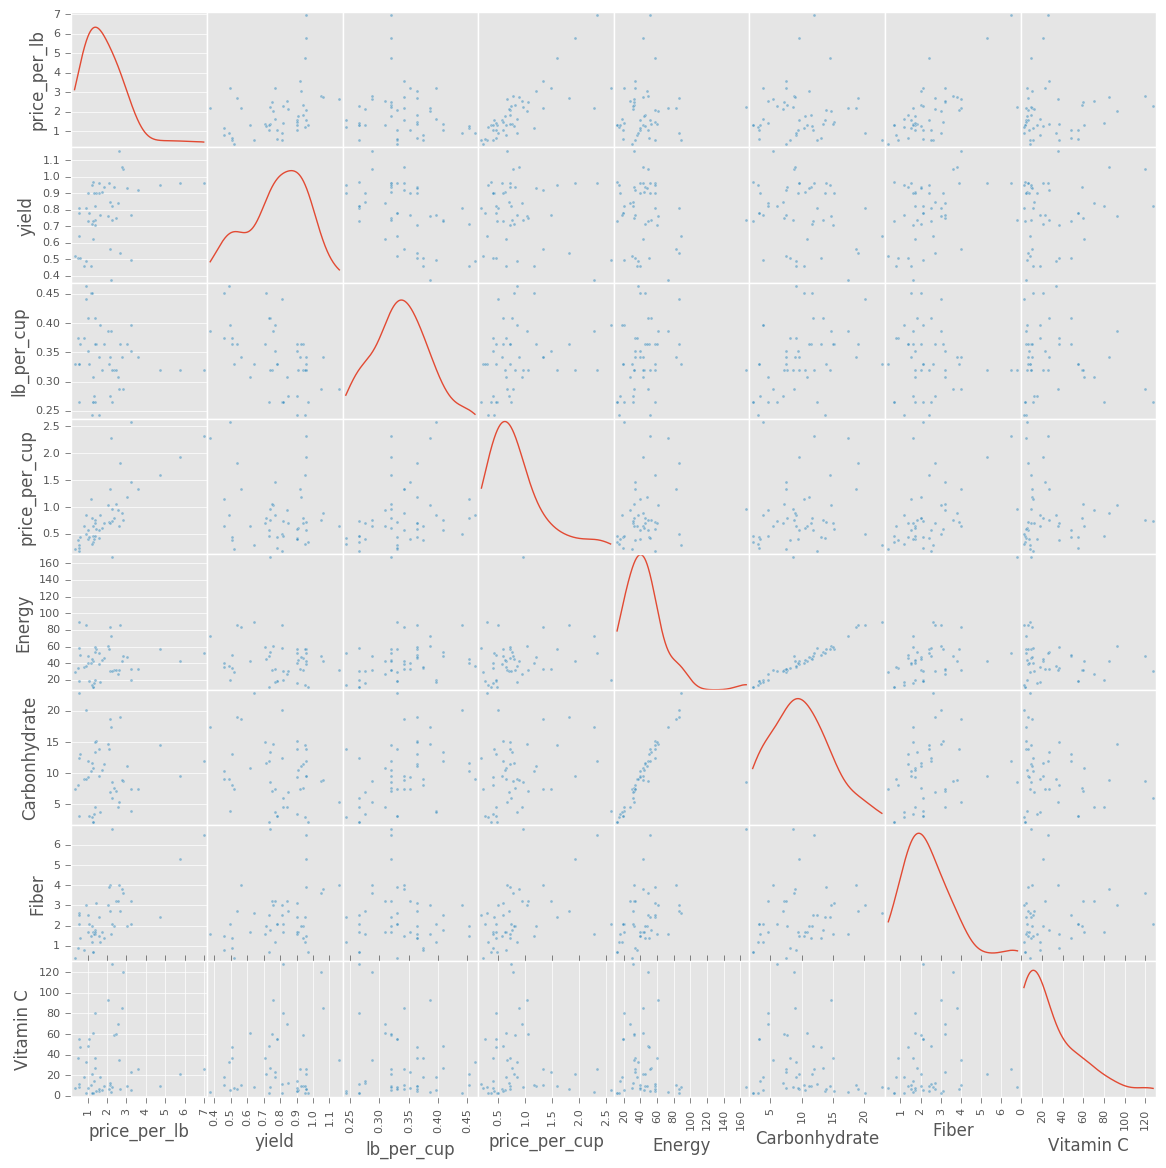

In [236]:
_ = scatter_matrix(fresh,figsize=(14,14),diagonal='kde')
_ = plt.show()

In [ ]:
#The above scatter plot matrix shows that there maybe some meaningful associations between Energy and Carbonhydrate, 
#Fiber and Price, and there seems to have not much relationship between Vitamin C and other variables.

In [292]:
import seaborn as sns
value = fresh["yield"]/fresh["price_per_lb"]
fresh["value"] = pd.DataFrame(value)

In [354]:
fresh

,form,price_per_lb,yield,lb_per_cup,price_per_cup,food,type,NDB number,Energy,Carbonhydrate,Fiber,Vitamin C,value
0,Fresh1,0.333412,0.520000,0.330693,0.212033,watermelon,fruit,09326,30.0,7.55,0.4,8.1,1.559632
1,Fresh1,0.535874,0.510000,0.374786,0.393800,cantaloupe,fruit,09181,34.0,8.16,0.9,36.7,0.951717
2,Fresh1,1.377962,0.740000,0.407855,0.759471,tangerines,fruit,09218,53.0,13.34,1.8,26.7,0.537025
3,Fresh1,2.358808,0.940000,0.319670,0.802171,strawberries,fruit,09316,32.0,7.68,2.0,58.8,0.398506
4,Fresh1,1.827416,0.940000,0.363763,0.707176,plums,fruit,09279,46.0,11.42,1.4,9.5,0.514388
5,Fresh1,1.035173,0.730000,0.407855,0.578357,oranges,fruit,09201,49.0,11.89,2.5,48.5,0.705196
6,Fresh1,6.975811,0.960000,0.319670,2.322874,raspberries,fruit,09302,52.0,11.94,6.5,26.2,0.137618
7,Fresh1,2.173590,0.560000,0.341717,1.326342,pomegranate,fruit,09286,83.0,18.70,4.0,10.2,0.257638
8,Fresh1,0.627662,0.510000,0.363763,0.447686,pineapple,fruit,09266,50.0,13.12,1.4,47.8,0.812539
9,Fresh1,3.040072,0.930000,0.363763,1.189102,apricots,fruit,09021,48.0,11.12,2.0,10.0,0.305914


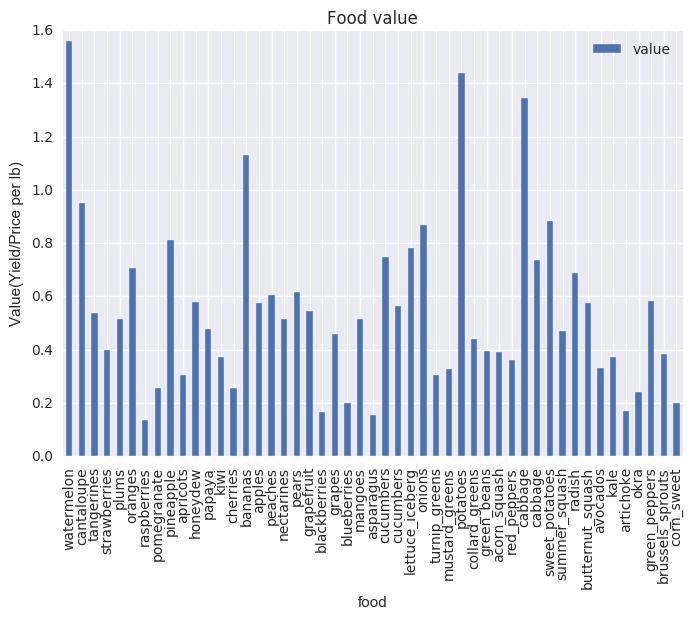

In [330]:
value = fresh["yield"]/fresh["price_per_lb"]
fresh["value"] = pd.DataFrame(value)

_ = fresh.plot(x='food', y='value', xlim= (0,24), kind = 'bar');
_ = plt.title('Food value')
_ = plt.ylabel("Value(Yield/Price per lb)")
_ = plt.show()

In [ ]:
#From the barplot of food value, which I divided yield by price per lb, I found out that the top best value food by
#look at just price and yield are:
#Watermelon, bananas, potatoes, green cabbage,and sweet potatoes.

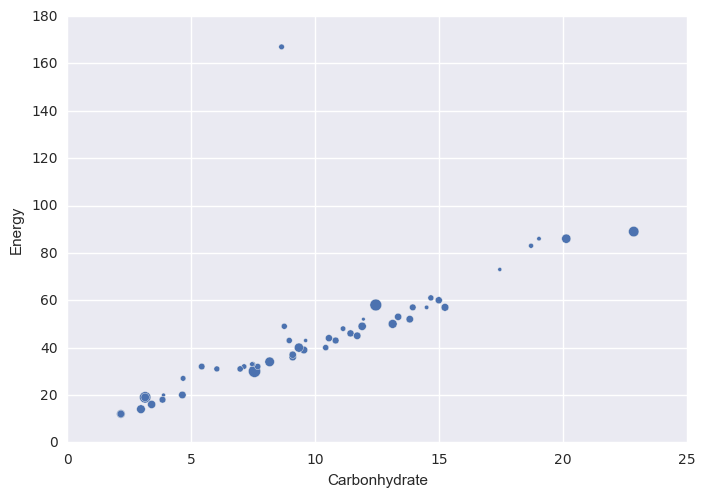

In [296]:
_ = fresh.plot('Carbonhydrate','Energy',s=fresh['value']*50,kind='scatter')
_ = plt.show()

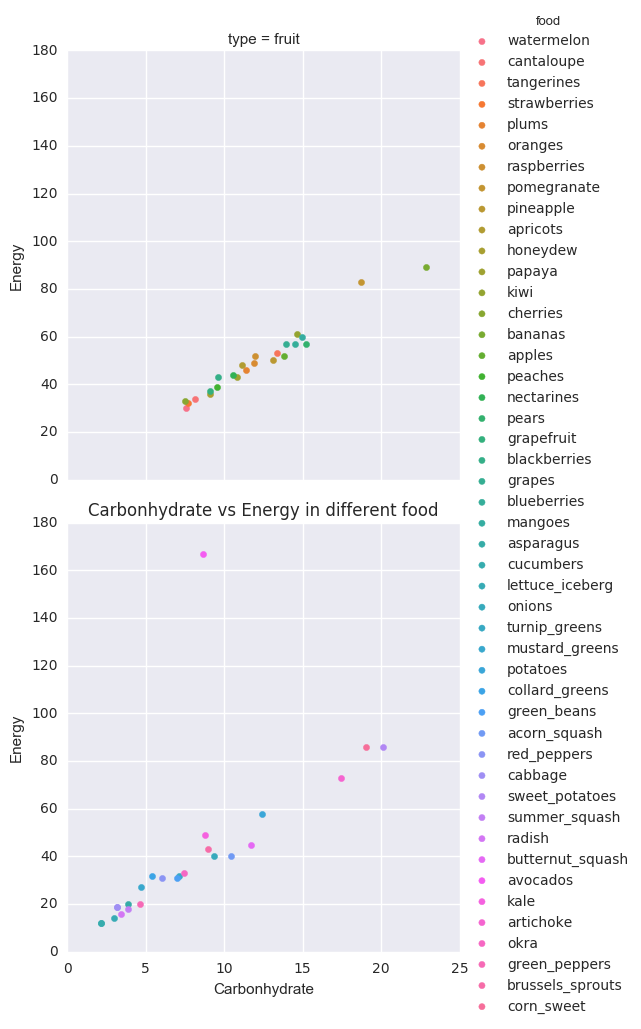

In [353]:
facets = sns.FacetGrid(fresh, hue = "food", row="type", size = 5)
facets.map(plt.scatter, "Carbonhydrate", "Energy").add_legend()
plt.title("Carbonhydrate vs Energy in different food")
plt.show()

In [ ]:
# From the two scatter plots above, Energy and Carbonhydrate have strong positive relationship.
# The first scatter plot showed that there's one fruit that has high energy and carbonhydrate value while 
# also having a relatively large dot size, indicating that it also has a high food value(yield/price per lb).
# By looking at the second plot, the color shows that it is bananas. And in the vegetable plot, avocados seems
# to have significantly high energy value even though its food value is low. Sweet potatoes seems to provide 
# the best combination of price, yield, energy, and carbonhydrate for vegetables group.

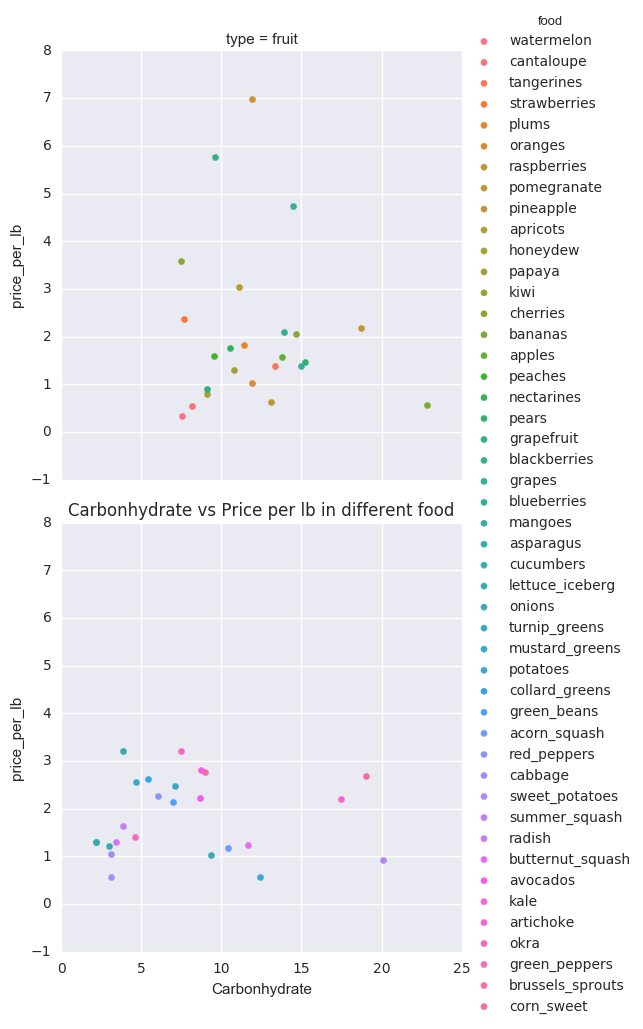

In [352]:
facets = sns.FacetGrid(fresh, hue = "food", row="type", size = 5)
facets.map(plt.scatter, "Carbonhydrate", "price_per_lb").add_legend()
plt.title("Carbonhydrate vs Price per lb in different food")
plt.show()

In [ ]:
#When looking at carbonhydrate vs price in different food, I can see that
# bananas and sweet potatoes outweight the others, having the lowest price and the higher carbonhydrate value.

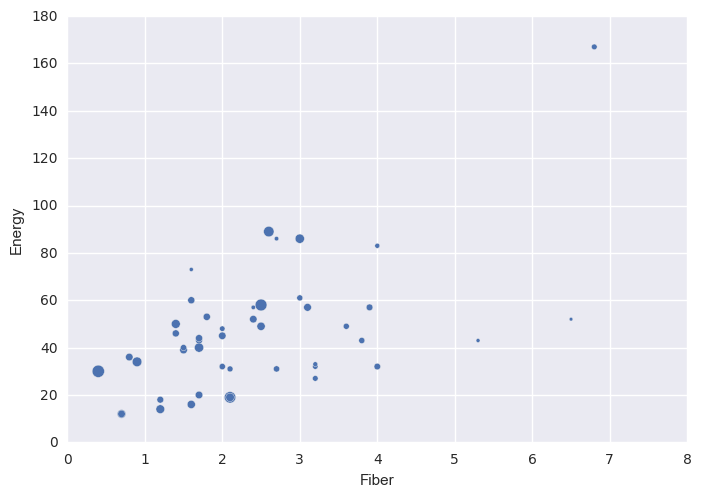

In [327]:
_ = fresh.plot(x = 'Fiber',y = 'Energy',s=fresh['value']*50, kind='scatter')
_ = plt.show()

In [ ]:
#The above plots suggest that fiber and energy are correlated. The higher fiber there is
# in the food leads to higher energy.

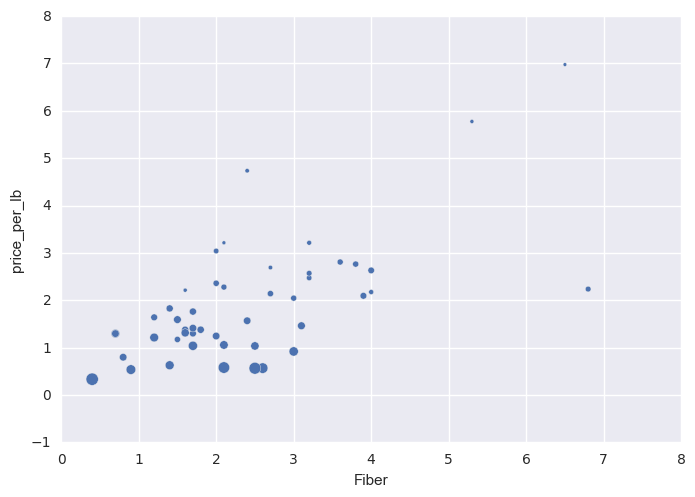

In [336]:
_ = fresh.plot(x = 'Fiber',y = 'price_per_lb',s=fresh['value']*50, kind='scatter')
_ = plt.show()

In [ ]:
#We can see that most top best food value(yield/price per lb) food has the fiber value between 0 to 3.

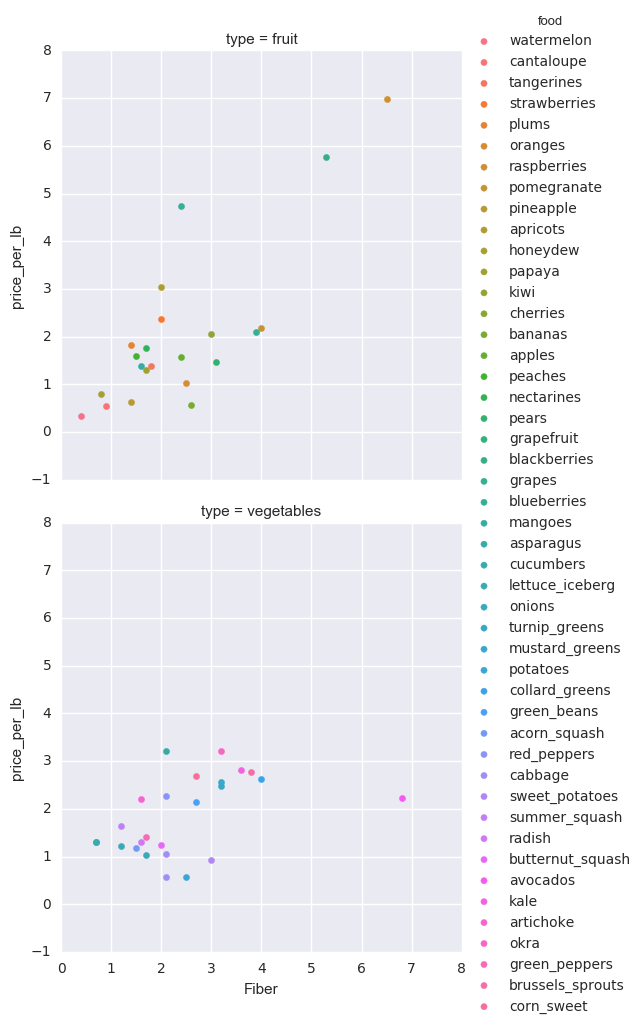

In [339]:
facets = sns.FacetGrid(fresh, hue = "food", row="type", size = 5)
facets.map(plt.scatter, "Fiber", "price_per_lb").add_legend()
plt.show()

In [355]:
fresh["Fiber"].mean()

2.4234042553191486

In [358]:
print fresh["Fiber"][14], fresh["Fiber"][38] #bananas and sweet potatoes

2.6 3.0


In [360]:
#We can see both from the plot and the statistics that the potential best food, bananas and sweet potatoes,
# fiber value are higher than average, which is 2.6g and 3.0g respectively.

In [361]:
## Conclusion
# In conclude, bananas provide the best combination of price, yield, and nutrition for fruits while 
# sweet potatoes provide the best combination for vegetables